In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
fast = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9.csv")
ckqst = pd.read_csv("../results_03_15/CKQST_KNN_NO_L9.csv")

fast_L6 = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L6.csv")

fast_spatialuni = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9_spatialuni.csv")
ckqst_spatialuni = pd.read_csv("../results_03_15/CKQST_KNN_NO_L9_spatialuni.csv")

res = pd.concat([
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    fast_L6.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # fast_spatialuni.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # ckqst_spatialuni.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

# res.loc[res["name"] == "FAST_KNN_NO_ObjIndex_objFreq", "creation_time"] = 1

name_map = {
    "FAST_KNN_NO_ObjIndex_L9": "FAST - Strat. 5 (maxLevel=9)",
    "FAST_KNN_NO_ObjIndex_L6": "FAST - Strat. 5 (maxLevel=6)",
    # "FAST_KNN_NO_ObjIndex_L9_spatialuni": "FAST - Strat. 5 (SpatialUni)",
    "CkQST_KNN_NO_L9": "CkQST (Baseline)",
    # "CkQST_KNN_NO_L9_spatialuni": "CkQST (SpatialUni)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])
res = res.sort_values(by=['name'])
# res = res[~(res['num_queries'] == 100000)]
res

,creation_time,search_time,num_queries,name
1,43821882822,1987516603,100000,CkQST (Baseline)
5,1817377551618,32149200924,2500000,CkQST (Baseline)
4,1357079106167,21587513214,2000000,CkQST (Baseline)
3,452288565280,10844402518,1000000,CkQST (Baseline)
0,1809163787038,31937985740,2500000,CkQST (Baseline)
2,220718554513,4376869437,500000,CkQST (Baseline)
2,228554224102,6998075850,500000,FAST - Strat. 5 (maxLevel=6)
1,52104851930,3175953447,100000,FAST - Strat. 5 (maxLevel=6)
0,49801346649,3219420676,100000,FAST - Strat. 5 (maxLevel=6)
4,2469880484014,12486990516,2500000,FAST - Strat. 5 (maxLevel=6)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

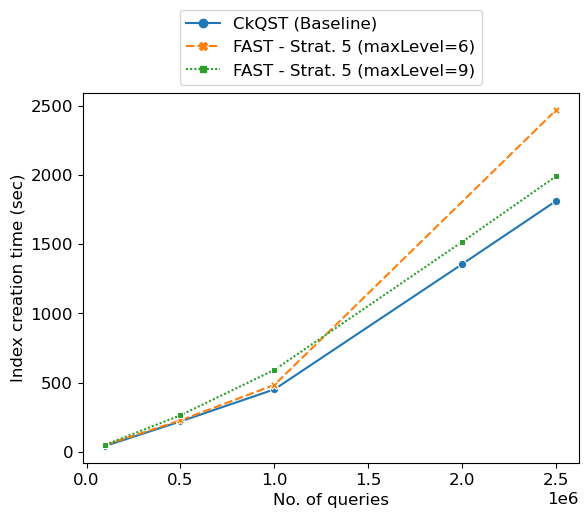

In [4]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

ax = sns.lineplot(x="No. of queries", y='Index creation time (sec)', hue='name', style='name', data=search_res, errorbar=None,
             markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [5]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
2,220718554513,8753.738874,500000,CkQST (Baseline)
2,228554224102,13996.151700,500000,FAST - Strat. 5 (maxLevel=6)
2,265144143434,19685.613012,500000,FAST - Strat. 5 (maxLevel=9)


In [6]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
5,1817377551618,32149200924,2500000,CkQST (Baseline)
0,1809163787038,31937985740,2500000,CkQST (Baseline)
4,2469880484014,12486990516,2500000,FAST - Strat. 5 (maxLevel=6)
6,2225273100495,18523747329,2500000,FAST - Strat. 5 (maxLevel=9)
0,1758129253734,19789606838,2500000,FAST - Strat. 5 (maxLevel=9)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

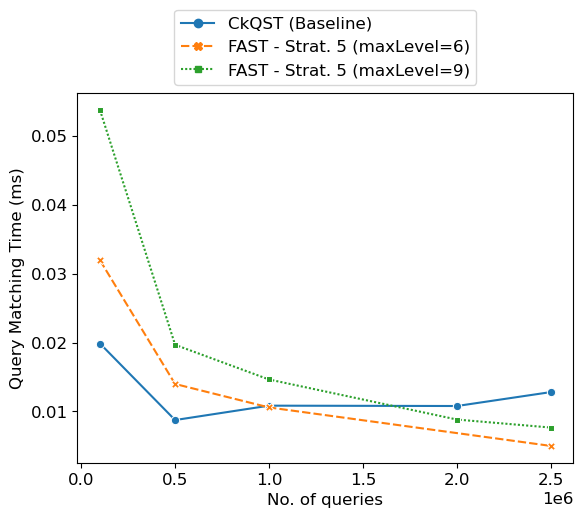

In [7]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (
            search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

ax = sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar=None, markers=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [8]:
# Optimization
# - Custom iterator
# - Circle bound calculation